In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
scaled_df = pd.read_csv('scaled_data.csv', index_col=[0])

In [3]:
# k-means(k=4)모델 선언

model = KMeans(n_clusters=4, random_state=123)

In [4]:
# model에 scaled_df 학습

model.fit(scaled_df)

/Users/crema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=123)

In [5]:
# label 컬럼 생성

scaled_df['label'] = model.predict(scaled_df)

In [6]:
# 각 클러스터에 몇 명의 고객이 할당되었는지 구하기

scaled_df['label'].value_counts()

label
2    84
0    77
3    43
1    21
Name: count, dtype: int64

In [7]:
centers = model.cluster_centers_

In [10]:
sns.set(style="darkgrid",
       rc={'figure.figsize':(16,9)})

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

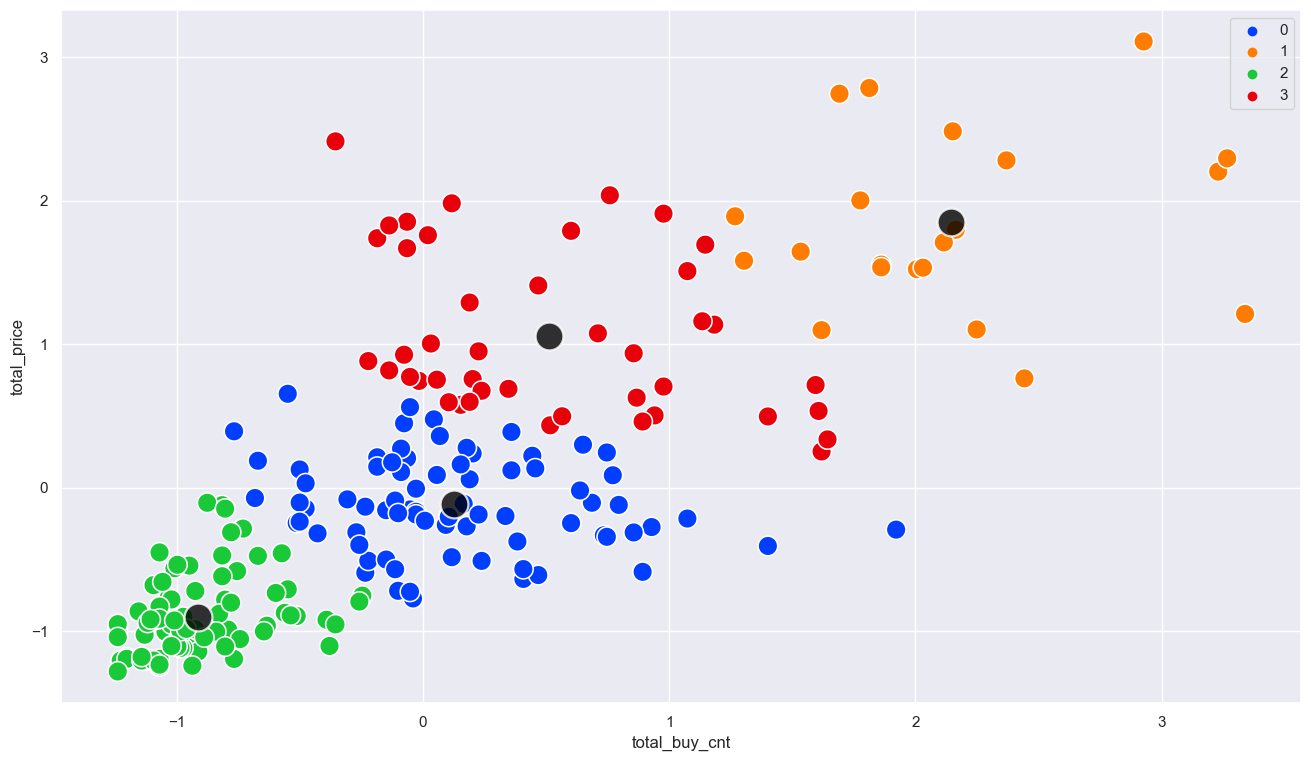

In [13]:
sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], data=scaled_df, hue=scaled_df['label'], s=200, palette='bright')
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=400)

In [14]:
# inertia 값 확인

print(model.inertia_)

79.67570438926424


In [15]:
# scaled_df 에 추가했던 label 열 제거

scaled_df = scaled_df.drop(['label'], axis=1)

/Users/crema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/crema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/crema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/crema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

<Axes: >

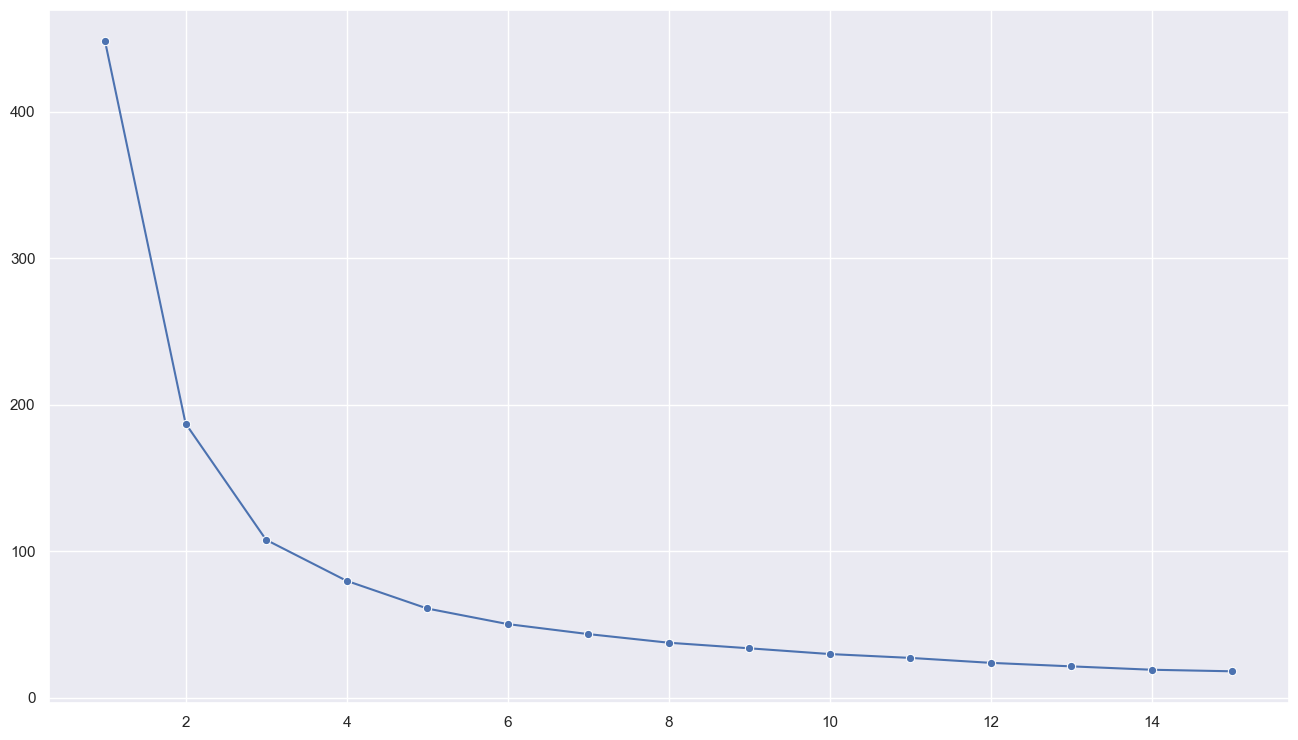

In [18]:
# k의 개수를 1~15까지 다르게 하여 각각의 inertia 계산 후, 시각화

# inertia 값 저장할 리스트

inertias = []

for k in range(1, 16): # k값의 범위 1~15로 지정
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)
    
    
# k값에 따른 inertia값 시각화
sns.lineplot(x=range(1, 16), y=inertias, marker='o')

In [19]:
%matplotlib inline

In [21]:
inertias = []

for k in range(1, 16):
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

/Users/crema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/crema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/crema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/crema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

<Axes: >

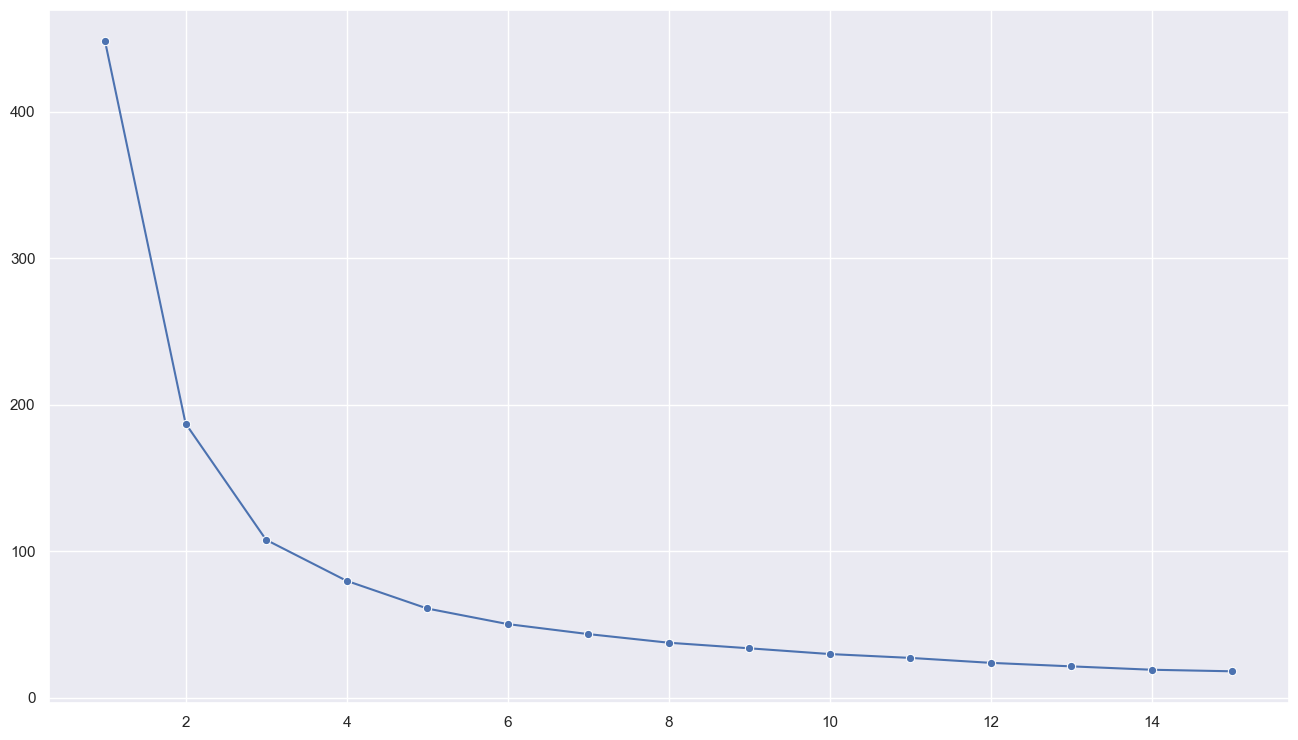

In [24]:
# 시각화

sns.set(style='darkgrid')
sns.lineplot(x=range(1,16), y=inertias, marker='o')

## 계층적 클러스터링

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

In [34]:
# 거리 : ward method

model = linkage(scaled_df, 'ward')

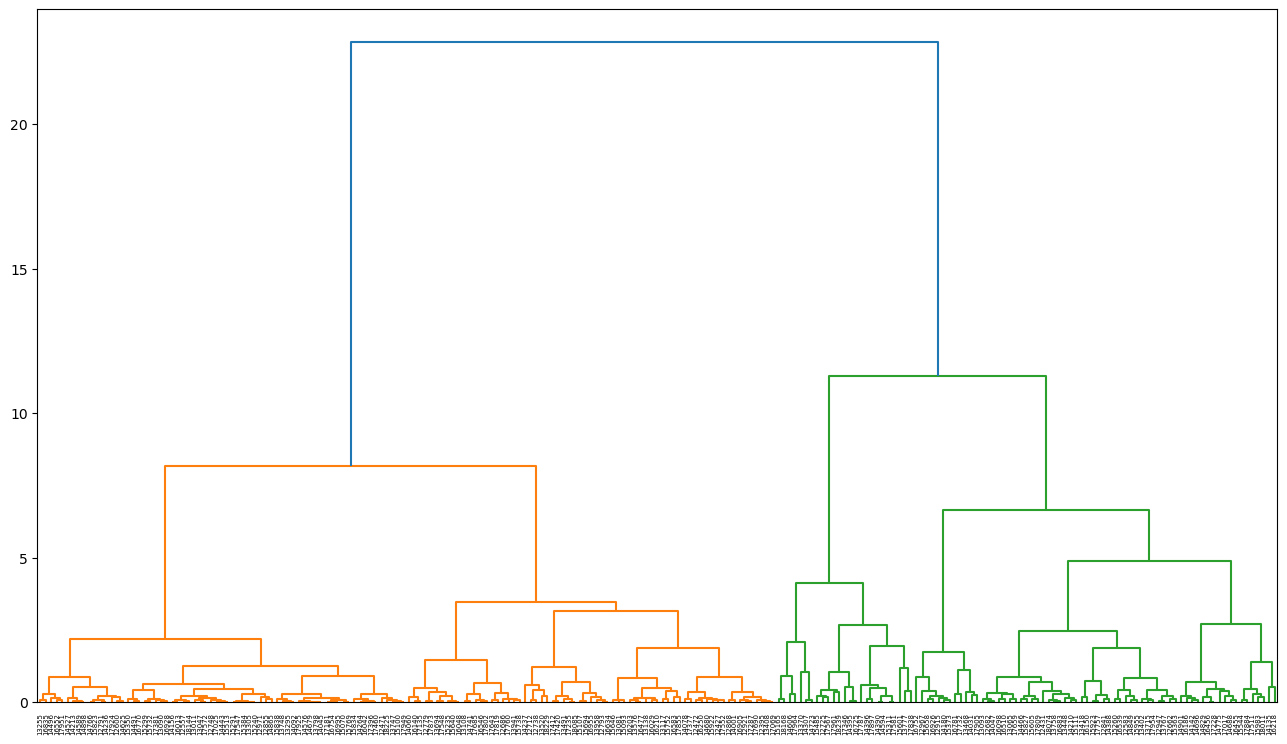

In [35]:
labelList = scaled_df.index

# 덴드로그램 사이즈와 스타일 조정

plt.figure(figsize=(16, 9))
plt.style.use('default')

dendrogram(model, labels=labelList)
plt.show()

In [38]:
cluster_num = 5

# 고객별 클러스터 라벨 구하기
scaled_df['label'] = cut_tree(model, cluster_num)

pd.DataFrame(scaled_df['label'].value_counts())

,count
label,
0,67
2,67
1,54
3,25
4,12


<Axes: xlabel='total_price', ylabel='total_buy_cnt'>

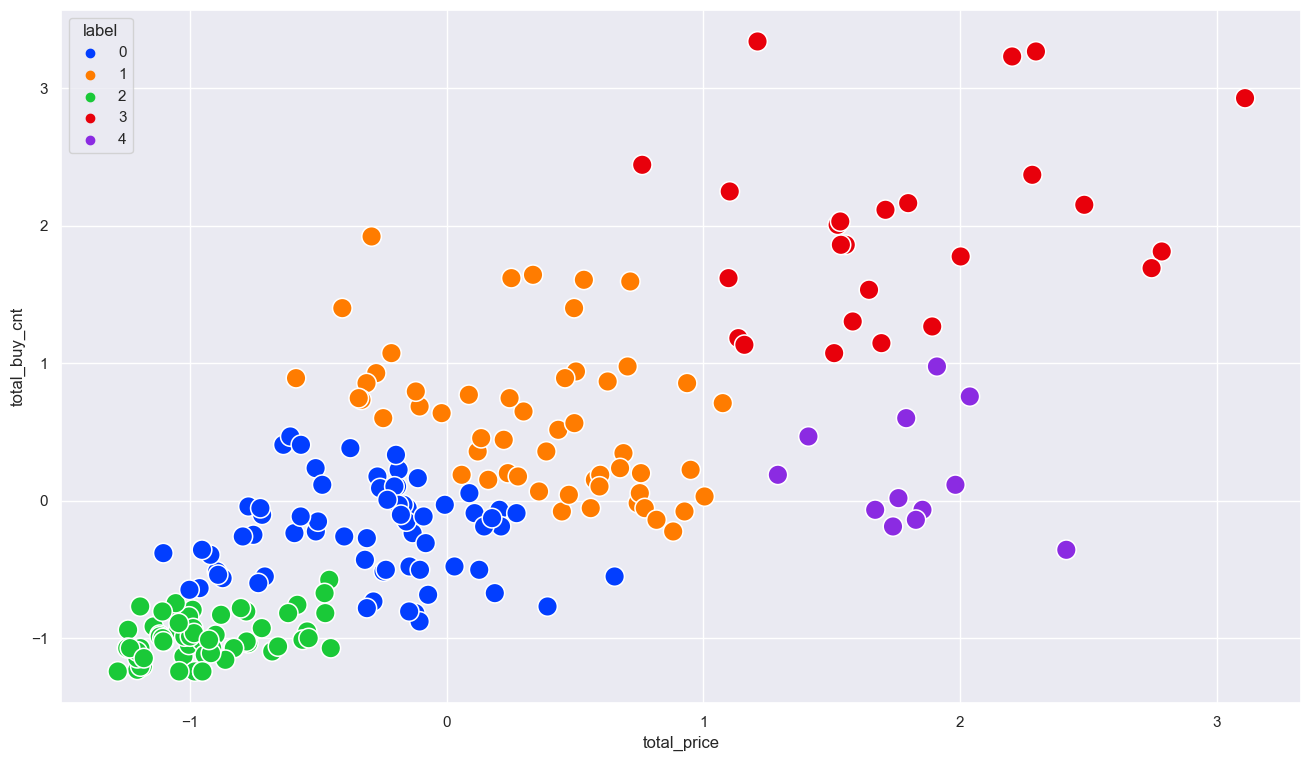

In [41]:
sns.set(style='darkgrid',
        rc = {'figure.figsize':(16,9)})

# 계층적 클러스터링
sns.scatterplot(x=scaled_df['total_price'], y=scaled_df['total_buy_cnt'], hue=scaled_df['label'], s=200, palette='bright')

### 계층적 클러스터링 실습

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

In [43]:
model = linkage(scaled_df, 'ward')

In [46]:
# 고객별 클러스터 라벨 구하기

cluster_num = 3

scaled_df['label'] = cut_tree(model, cluster_num)

# 각 클러스터에 포함된 데이터 개수 확인
pd.DataFrame(scaled_df['label'].value_counts())

,count
label,
0,121
1,67
2,37
